# <u>PROJECT</u>
<hr style="border:2px solid"> </hr>

#### Semester     : 2021-2022 Fall
#### Lecture    : CENG463
#### Instructor : Assoc. Prof. Fatih NAR

Group 15                      | Student ID    | 
:-----------------------------|:-------------:|
**Semih KARACAOĞLU**          | 17050111008   |
**Muhammed Said POLAT**       | 18050111009   |
**Mehmet AY**                 | 16050111043   |

<hr style="border:2px solid"> </hr>

### <u>Contents</u>

<b>1) Data Preparation</b>
><b>1.1)</b> Image Reading
><br><b>1.2)</b> Resizing images</br>
><br><b>1.3)</b> Normalization</br>
><br><b>1.4)</b> Grayscaling</br>
><br><b>1.5)</b> Removing Noise (Denoise)</br>
><br><b>1.6)</b> Image SobelX (Filtering)</br>

<br><b>2) Feature Extraction</b></br>
><b>2.1)</b> HOG (Histogram of Oriented Gradients)
><br><b>2.2)</b> Hu Moments</br>
><br><b>2.3)</b> Haralick Texture</br>
><br><b>2.4)</b> Color Histogram</br>

<br><b>3) Generating Analyzable Data</b></br>
><b>3.1)</b> Train-Test Split
><br><b>3.2)</b> Feature Vectors Scaling</br>

<br><b>4) Prediction on Validation Data</b></br>
><b>4.1)</b> Zero-R
><br><b>4.2)</b> SVM with OvO</br>
><br><b>4.3)</b> Rondom Forest</br>
><br><b>4.4)</b> KNN</br>
><br><b>4.5)</b> Logistic Regression</br>

<br><b>5) Test Results</b></br>
><b>5.1)</b> Zero-R
><br><b>5.2)</b> SVM with OvO</br>
><br><b>5.3)</b> Rondom Forest</br>
><br><b>5.4)</b> KNN</br>
><br><b>5.5)</b> Logistic Regression</br>

<hr style="border:2px solid"> </hr>

#### <u>Preliminary Information on Data</u>

<b>Objective</b>

We want to guess <b>what is the name of the given flower image</b> analyzed with the Machine Learning algorithms.


<b>Content:</b>

<u>Training dataset:</u> 8189 images

<u>Target Variables:</u> We want to reach true 'Labels’. It shows what is the name of the given image.

<hr style="border:2px solid"> </hr>

#### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import cv2
import glob
import matplotlib
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage.transform import resize
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import statistics
import mahotas
from sklearn.preprocessing import MinMaxScaler
from skimage import feature
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE # for t-SNE dimensionality reduction
from sklearn.manifold import LocallyLinearEmbedding # for LLE dimensionality reduction
from sklearn import preprocessing
import random
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFromModel
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression

In [2]:
%%html
<style>
table {float:left}
td {
  font-size: 15px
}
</style>

<hr style="border:2px solid gray"> </hr>
<hr style="border:2px solid gray"> </hr>
<hr style="border:2px solid gray"> </hr>

# 1) Data Preparation

### 1.1) <u>Image Reading</u>

In [3]:
data_temp = []
# files = glob.glob("./102flowers\jpg\*.jpg")
files = glob.glob("./102flowers\sementations\*.jpg")
for i in files:
    img = cv2.imread (i)
    data_temp.append (img)

We <b>delete the data_temp</b> list that we don't need anymore in order to take up unnecessary space in the memory, because we need to avoid unnecessary memory usage because we are processing a large amount of data. Our goal here is <b>memory optimization</b>.

In [4]:
X = np.array(data_temp, dtype=object)
del data_temp

There are <b>8189 images</b> in our data set.

In [5]:
len(X)

8189

In [6]:
lbl = pd.read_csv('flowers_labels.txt', header = None)
y = np.array(lbl)
del lbl

As we can see there are <b>102 different types of flowers</b> in this dataset. Actually, this number represents the <b>number of classes</b> in the dataset.

In [7]:
np.unique(y)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102], dtype=int64)

<b>What an Image's Pixel Data Shows :</b> We can access a image's pixel value by its row and column coordinates. For BGR image, it returns an array of Blue, Green, Red values. For grayscale image, just corresponding intensity is returned. These numbers, or the <b>pixel values</b>, denote the intensity or <b>brightness of the pixel</b>. <b>Smaller numbers</b> (closer to zero) represent <b>black</b>, and <b>larger numbers</b> (closer to 255) denote <b>white</b>.

In [8]:
px = X[0][300,300]
print("It shows the BGR values of first image : ",px)

It shows the BGR values of first image :  [167 244 246]


The shape of an image is accessed by img.shape. It returns a tuple of the number of rows, columns, and channels (if the image is color). The third number (i.e. 3) is for three layers: Red, Green, Blue. If an image is grayscale, the tuple returned contains only the number of rows and columns, so it is a good method to check whether the loaded image is grayscale or color.

In [9]:
print('Type of the image : ' , type(X[0])) 
print('Shape of the image : {}'.format(X[0].shape)) 
print('Image Hight : {}'.format(X[0].shape[0])) 
print('Image Width : {}'.format(X[0].shape[1])) 
print('Dimension of the image : {}'.format(X[0].ndim))

Type of the image :  <class 'numpy.ndarray'>
Shape of the image : (500, 591, 3)
Image Hight : 500
Image Width : 591
Dimension of the image : 3


In [10]:
print('Size of the image : {}'.format(X[0].size))
print('Maximum RGB value in this image : {}'.format(X[0].max())) 
print('Minimum RGB value in this image : {}'.format(X[0].min()))

Size of the image : 886500
Maximum RGB value in this image : 255
Minimum RGB value in this image : 0


Here we can visualize some of the images from data to understand data more clearly.

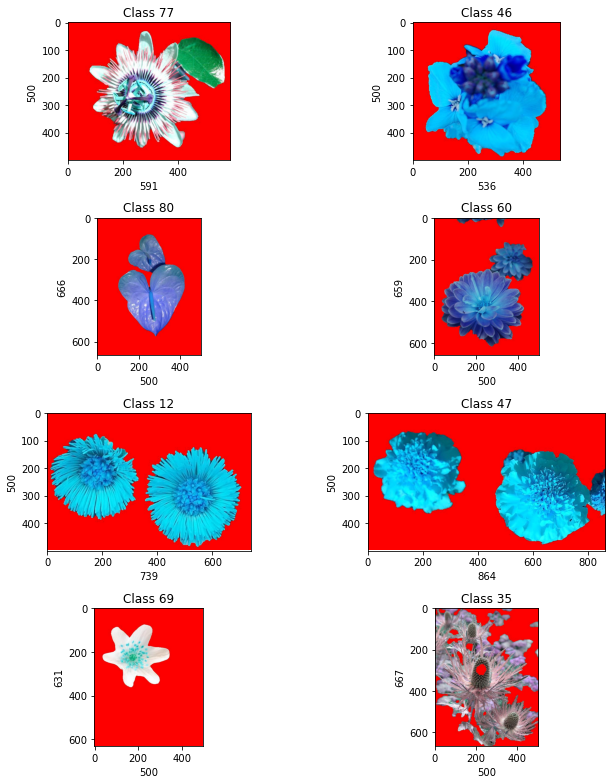

In [11]:
plt.figure(figsize=(11,11))
for i in range(1,8000,1000):    
    plt.subplot(4,2,int(i/1000)+1)
    plt.tight_layout()
    plt.imshow(X[i-1])
    plt.title("Class " + str(int(y[i-1])))
    plt.xlabel(X[i-1].shape[1], fontsize=10)
    plt.ylabel(X[i-1].shape[0], fontsize=10)

### 1.2) <u>Resizing images</u>

The reason we resize the images is because each of them has <b>different height and width</b> values. So, we need to resize all the images into a single shape in order to avoid any future issue related to computation. We need fixed sizes to analyze images. In here, we resize every image to <b>512x256 pixel</b> value.

In [12]:
X_resized =[]
for i in range(len(X)):
    resized = cv2.resize(X[i],(64*4, 128*4)) # 512x256
    X_resized.append(resized)

Below image shows <b>original version</b> which is before resizing process.

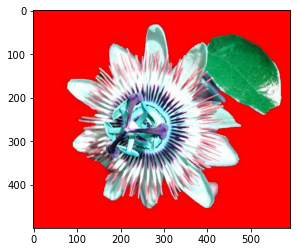

In [13]:
plt.imshow(X[0])

This below one shows the image which is <b>after resizing</b> process.

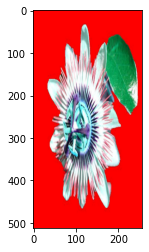

In [14]:
plt.imshow(X_resized[0])

### 1.3) Normalization

Normalization in image processing is used to change the <b>intensity level of pixels</b>. It is used to get better contrast in images with poor contrast due to glare.

In [15]:
X_normalized =[]
for i in range(len(X_resized)):
    normalized = cv2.normalize(X_resized[i], None, alpha=0,beta=200, norm_type=cv2.NORM_MINMAX) # 512x256
    X_normalized.append(normalized)

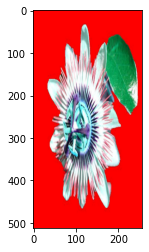

In [16]:
plt.imshow(X_resized[0])

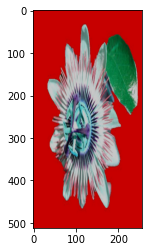

In [17]:
plt.imshow(X_normalized[0])

In [18]:
del X_resized

### 1.4) <u>Grayscaling</u>

We <b>remove the colors</b> in the image with grayscaling. The reason for this is that we will use the data we get from here in some feature extraction methods where we will <b>only need the edges</b>. So, we create <b>grayscaled</b> images from data.

In [19]:
X_gray = []
for i in range(len(X_normalized)):
    X_gray.append(cv2.cvtColor(X_normalized[i], cv2.COLOR_BGR2GRAY))

Here we can see that the <b>colored image</b> contains rows, columns, and channels as it is a colored image there are three channels RGB while <b>grayscale pictures</b> have <b>only one channel</b>. So, we can clearly identify the colored and grayscale images by their shapes.

Resized image shape (Not grayscaled):  (512, 256, 3)


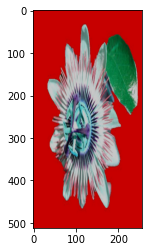

In [20]:
plt.imshow(X_normalized[0])
print("Resized image shape (Not grayscaled): ",X_normalized[0].shape)

Grayscaled and resized image shape :  (512, 256)


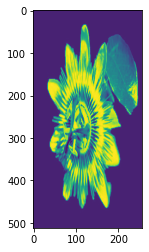

In [21]:
plt.imshow(X_gray[0])
print("Grayscaled and resized image shape : ",X_gray[0].shape)

Let’s look at the size of the images. Image size is the product of the rows, columns, and channels. Despite being the same images grayscale is <b>smaller in size</b> because it has only 1 channel. 

In [22]:
print("Original image size : ",X[0].size)
print("Grayscale image size : ",X_gray[0].size)

Original image size :  886500
Grayscale image size :  131072


### 1.5) <u>Removing Noise (Denoise)</u>

<b>Denoising</b> is a process to reserve the details of an image while <b>removing the random noise</b> from the image as far as possible. We aim to reach a <b>reliable results</b> by getting rid of noise in our data.

In [23]:
# Remove Gaussian noise

X_denoise = []
for i in range(len(X)):
    denoise = cv2.GaussianBlur(X_gray[i], (5, 5), 0)
    X_denoise.append(denoise)

This below picture shows how it was <b>before denoising</b> process.

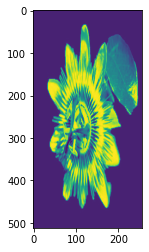

In [24]:
plt.imshow(X_gray[0])

This shows how it is <b>after the denoising</b> process.

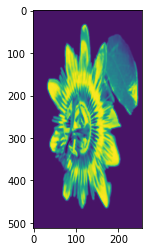

In [25]:
plt.imshow(X_denoise[0])

In [26]:
np.shape(X_denoise[0])

(512, 256)

To <b>improve performance</b>, we <b>remove the data</b> that we don't need anymore. Here, we didn't delete the X_normalized because we will use it in Feature Selection section.

In [27]:
del X
del X_gray

### 1.6) <u>Image SobelX</u>

Sobel filter, is used in particularly within <b>edge detection algorithms</b> where it creates an image emphasising edges. It didn't improve the performance so, we didn't rather to use it. S

In [28]:
def filter_image_sobelx(img):
    # Perform filtering to the input image
    sobelx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=3)
    return sobelx

In [29]:
X_sobelx = []
for i in range(len(X_denoise)):
    sobelx = filter_image_sobelx(X_denoise[i])
    X_sobelx.append(sobelx)

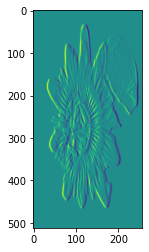

In [30]:
plt.imshow(X_sobelx[0])

In [31]:
del X_sobelx

### 1.7) <u>Label Encoding</u>

We don't need label encoding because labels are already numbers <b>not qualitative</b> variables. If it was just names of the flowers we would need to do label encoding to make them quantitative.

### <u>End  Of the Data Preparation Section</u>

<hr style="border:2px solid gray"> </hr>
<hr style="border:2px solid gray"> </hr>
<hr style="border:2px solid gray"> </hr>

# 2) Feature Extraction

Feature extraction involves <b>reducing the number of resources required</b> to describe a large set of data. When performing analysis of complex data one of the major problems stems from the number of variables involved. <b>Analysis with a large number of variables</b> generally requires a <b>large amount of memory and computation power</b>, also it may cause a classification algorithm to <b>overfit to training samples</b> and generalize poorly to new samples. Feature extraction is a general term for methods of constructing combinations of the variables to get around these problems while still describing the data with sufficient accuracy. This is the key factor for a Machine Learning algorithm to be successful.

### 2.1) <u>HOG</u>

The <b>HOG features</b> are widely use for <b>object detection</b>. HOG decomposes an image into <b>small squared cells</b>, computes an histogram of oriented gradients in each cell, <b>normalizes the result</b> using a block-wise pattern, and return a descriptor for each cell

In [32]:
ppc = 16
hog_images = []
hog_features = []
for image in X_denoise[:1000]:
    fd, hog_image = hog(image, orientations=9, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4), block_norm= 'L2-Hys', visualize=True)
    hog_images.append(hog_image)
    hog_features.append(fd)

In [33]:
np.shape(hog_features)

(1000, 54288)

This below picture shows how an image becomes after HOG operation.

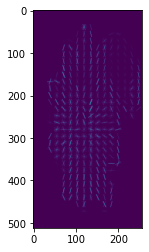

In [34]:
plt.imshow(hog_images[0])

In [35]:
del hog_images

### PCA on HOG Feature

PCA (Principal Components Analysis) produces a low-dimensional representation of a dataset. It depends a sequence of linear combinations of the variables that have maximal variance, and are mutually uncorrelated. Now we apply <b>PCA</b> to <b>Hog feature</b> vectors, because they are very sparse and have high unnecessary dimension.

In [36]:
pca = PCA()
hog_features_pca = pca.fit_transform(hog_features) 

In [37]:
del hog_features

In [38]:
np.shape(hog_features_pca)

(1000, 1000)

### 2.2) <u>Hu Moments</u>

<b>Hu Moments</b> are a <b>set of 7 numbers</b> calculated using <b>central moments</b> that are invariant to image transformations. The <b>first 6 moments</b> have been proved to be invariant to translation, scale, and rotation, and reflection. While the <b>7th moment’s</b> sign changes for image reflection.

In [39]:
# feature-descriptor-1: Hu Moments
def fd_hu_moments(image):
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

In [40]:
fv_hu_moments = []
for i in range(len(X_denoise)):
    fv_hu_moments.append(fd_hu_moments(X_denoise[i]))

In [41]:
np.shape(fv_hu_moments)

(8189, 7)

### 2.3) <u>Haralick Texture</u>

<b>Haralick features</b> are used to describe the <b>texture</b> of an image. Texture refers to the appearance, consistency, or “feeling” of a surface. Examples of textures include “rough” vs. “soft.” Potential applications of Haralick features include determining if a road is paved vs. gravel.

In [42]:
# feature-descriptor-2: Haralick Texture
def fd_haralick(image):
    # compute the haralick texture feature vector
    haralick = mahotas.features.haralick(image).mean(axis=0)
    # return the result
    return haralick

In [ ]:
fv_haralick = []
for i in range(len(X_denoise)):
    fv_haralick.append(fd_haralick(X_denoise[i]))

In [ ]:
np.shape(fv_haralick)

### 2.4) <u>Color Histogram</u>

<b>Color histogram</b> is a representation of the distribution of colors in an image. For digital images, a color histogram represents the number of pixels that have colors in each of a fixed list of color ranges, that span the image's color space, the set of all possible colors.

In [ ]:
# feature-descriptor-3: Color Histogram
def fd_histogram(image, mask=None):
    # bins for histogram
    bins = 8
    # convert the image to HSV color-space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # compute the color histogram
    hist  = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    # normalize the histogram
    cv2.normalize(hist, hist)
    # return the histogram
    return hist.flatten()

In [ ]:
fv_histogram = []
for i in range(len(X_normalized)):
    fv_histogram.append(fd_histogram(X_normalized[i]))

In [ ]:
np.shape(fv_histogram)

In [ ]:
del X_normalized

<hr style="border:2px solid"> </hr>

### 2.5) BEBLID

In [ ]:
# detector = cv2.ORB_create(10000)

# kpts = detector.detect(X_denoise, None)

In [ ]:
# # Comment or uncomment to use ORB or BEBLID
# descriptor = cv2.xfeatures2d.BEBLID_create(0.75)

In [ ]:
# # descriptor = cv.ORB_create()
# kpts1, desc1 = descriptor.compute(img1, kpts1)
# kpts2, desc2 = descriptor.compute(img2, kpts2)

### 2.6) SIFT

In [ ]:
# # create SIFT feature extractor
# sift = cv2.SIFT_create()

In [ ]:
# # detect features from the image
# keypoints = []
# descriptors = []
# for i in range(len(X_resized[:1000])):
#     keypoints_1, descriptors_1 = sift.detectAndCompute(X_resized[i], None)
#     keypoints.append(keypoints_1)
#     descriptors.append(descriptors_1)

In [ ]:
# len(descriptors[2])

In [ ]:
# descriptor_arr = np.array(descriptors,dtype=object)

In [ ]:
# len(descriptors)

In [ ]:
# desc = np.reshape(descriptors[0], (len(descriptors[0])//128, 128)) # (notice the // here)
# desc = np.float32(desc)

In [ ]:
# kmeans = KMeans(n_clusters=102, random_state=0).fit(descriptors)

### 2.2) BoVW  (Bag of Visual Words)

### 2.3) ORB

In [ ]:
# # create ORB dectector
# orb = cv2.ORB_create(nfeatures=2000)  # default features is 500

In [ ]:
# kp_logo = []
# des_logo = []
# for image_train in range(len(data_gray[:1000])):
#     # find key point and descriptor
#     kp_logo1, des_logo1 = orb.detectAndCompute(data_gray[i], None)
#     kp_logo.append(kp_logo1)
#     des_logo.append(des_logo1)

In [ ]:
# np.shape(des_logo)

### 2.4) BRISK

In [ ]:
# # Initiate BRISK descriptor
# BRISK = cv2.BRISK_create()

In [ ]:
# # Find the keypoints and compute the descriptors for input images
# brisk_keypoints =  []
# brisk_features = []
# for image in data_resize[0:1000]:
#     keypoints1, descriptors = BRISK.detectAndCompute(data_resize[i], None)
#     brisk_keypoints.append(keypoints1)
#     brisk_features.append(descriptors)

<hr style="border:2px solid"> </hr>

### <u>End of The Feature Extraction Section</u>

<hr style="border:2px solid gray"> </hr>
<hr style="border:2px solid gray"> </hr>
<hr style="border:2px solid gray"> </hr>

# 3) Generating Analyzable Data

### 3.1) Train-Test Split

In [ ]:
hog_features = np.array(hog_features_pca)

In [ ]:
hog_features = np.array(hog_features_pca)
del hog_features_pca
fv_hu_moments_arr = np.array(fv_hu_moments)
del fv_hu_moments
fv_haralick_arr = np.array(fv_haralick)
del fv_haralick
fv_histogram_arr = np.array(fv_histogram)
del fv_histogram

In [ ]:
global_features_rf = np.hstack((fv_hu_moments_arr,fv_haralick_arr,fv_histogram_arr,y))
global_features_svm = np.hstack((hog_features,y[:1000]))
np.random.seed(60)
#60 rf %57
#40 svm best
np.random.shuffle(global_features_rf)
np.random.shuffle(global_features_svm)

In [ ]:
del hog_features
del fv_hu_moments_arr
del fv_haralick_arr
del fv_histogram_arr

<hr style="border:2px solid"> </hr>

### Feature Selection

It didn't give a good result.

In [ ]:
# slc = SelectFromModel(estimator=LogisticRegression()).fit(global_features_rf[:,:-1], global_features_rf[:,-1:].ravel())

In [ ]:
# slc.estimator_.coef_

In [ ]:
# slc.threshold_

In [ ]:
# global_features = slc.fit_transform(global_features_rf[:,:-1])

In [ ]:
# global_features = np.hstack((global_features,y[:1000]))

<hr style="border:2px solid"> </hr>

We keep 80 percent of the data for training data.

In [ ]:
#What percentage of data you want to keep for training svm
percentage = 80
length_svm = len(global_features_svm)
partition_svm = int(length_svm*percentage/100)
index_svm = int((length_svm-partition_svm)/2)

In [ ]:
#What percentage of data you want to keep for training svm
percentage = 80
length_rf = len(global_features_rf)
partition_rf = int(length_rf*percentage/100)
index_rf = int((length_rf-partition_rf)/2)

We divided data into <u>three part</u> as <b>training(%80)</b>, <b>validation(%10)</b> and <b>test(%10)</b> data.

In [ ]:
X_train_svm, X_validation_svm, X_test_svm = global_features_svm[:partition_svm,:-1],  global_features_svm[partition_svm:index_svm+partition_svm,:-1], global_features_svm[index_svm+partition_svm:,:-1]
y_train_svm, y_validation_svm, y_test_svm = global_features_svm[:partition_svm,-1:].ravel() , global_features_svm[partition_svm:index_svm+partition_svm,-1:].ravel(), global_features_svm[index_svm+partition_svm:,-1:].ravel()

In [ ]:
del global_features_svm

In [ ]:
X_train_rf, X_validation_rf, X_test_rf = global_features_rf[:partition_rf,:-1],  global_features_rf[partition_rf:index_rf+partition_rf,:-1], global_features_rf[index_rf+partition_rf:,:-1]
y_train_rf, y_validation_rf, y_test_rf = global_features_rf[:partition_rf,-1:].ravel() , global_features_rf[partition_rf:index_rf+partition_rf,-1:].ravel(), global_features_rf[index_rf+partition_rf:,-1:].ravel()

In [ ]:
del global_features_rf

### <u>End of The Generating Analyzable Data</u>

<hr style="border:2px solid gray"> </hr>
<hr style="border:2px solid gray"> </hr>
<hr style="border:2px solid gray"> </hr>

# 4) Prediction on Validation Data

### 4.1) <u>Zero R (baseline)</u>

We use Zero R classifier to see <b>benchmarking</b> result. It predicts most frequent one.

In [ ]:
clf_dummy = DummyClassifier(strategy="most_frequent")

In [ ]:
#fit
clf_dummy.fit(X_train_svm, y_train_svm);

In [ ]:
#predict
y_pred_train_dummy = clf_dummy.predict(X_train_svm)
y_pred_validation_dummy = clf_dummy.predict(X_validation_svm)
# y_pred_test_dummy = clf_dummy.predict(X_test_svm)

In [ ]:
#results
print("Training Accuracy Result: "+str(accuracy_score(y_train_svm, y_pred_train_dummy)))
print("Validation Accuracy Result: "+str(accuracy_score(y_validation_svm, y_pred_validation_dummy)))
# print("Test Accuracy Result: "+str(accuracy_score(y_test_svm, y_pred_test_dummy)))
# print('\n')
# print(classification_report(y_test_svm, y_pred_test_dummy,zero_division=1))

Footnotes: 
<br>1) Zero-R works good with PCA applied HOG.(0.24)</br>

### 4.2) <u>SVM with OvO</u>

We have applied SVM with OvO because the simple SVM model is suitable for <b>linear fitting</b>. But, we can use SVM for <b>multiclass classification</b> with using <b>OvO</b>.

The SVM is an approximate implementation of a theoretical bound on the generalisation performance that is independent of the dimensionality of the feature space. This means that there is a good reason to suggest that performing feature selection might not make the performance of the classifier any better.

In [ ]:
# SVM for multi-class classification using built-in one-vs-rest (all)

# define model
clf_svm = svm.SVC(decision_function_shape='ovo')

In [ ]:
# fit model
clf_svm.fit(X_train_svm, y_train_svm)

In [ ]:
# make predictions
y_pred_train_svm = clf_svm.predict(X_train_svm)
y_pred_validation_svm = clf_svm.predict(X_validation_svm)

In [ ]:
print("Accuracy for training data : "+str(accuracy_score(y_train_svm, y_pred_train_svm)))
print("Accuracy for validation data : "+str(accuracy_score(y_validation_svm, y_pred_validation_svm)))

Footnotes : 
<br>1) SVM works good with PCA applied HOG, using just resized(colored) image.(acc=0.68)</br>
<br>2) SVM works good with PCA and HOG(L2-Hys) applied denoised(resized, grayscaled) images.(acc=0.75)</br>
<br>3) SVM works good with PCA and HOG(L2) applied denoised images.(acc=0.80)</br>

### 4.3) <u>Random Forest</u>

In [ ]:
#Create a Gaussian Classifier
clf_rf = RandomForestClassifier(n_estimators=100)

In [ ]:
#Train the model using the training sets y_pred=clf.predict(X_test)
clf_rf.fit(X_train_rf, y_train_rf)

In [ ]:
# make predictions
y_pred_train_rf = clf_rf.predict(X_train_rf)
y_pred_validation_rf = clf_rf.predict(X_validation_rf)

In [ ]:
# plt.title('Feature Importances')
# plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
# # plt.yticks(range(len(indices)), [features[i] for i in indices])
# plt.xlabel('Relative Importance')
# plt.show()

In [ ]:
print("Accuracy for training data : "+str(accuracy_score(y_train_rf, y_pred_train_rf)))
print("Accuracy for validation data : "+str(accuracy_score(y_validation_rf, y_pred_validation_rf)))

Footnotes : 
<br>1) PCA decreases the Random Forest Performance.(0.45)</br>
<br>2) Denoising operation didn't affect the accuracy performance with just using PCA and HOG. But, compilation performance is better than just resized image.(acc=0.47)</br>
<br>3) Using HOG L2 instead of L2-Hys increased performance.(0.56)</br>

### 4.4) <u>KNN</u>

In [ ]:
scores = [];

kfold = 10
bestScore = 0;
bestK = 0;
for k in range(1, 51, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knnScores = cross_val_score(knn, X_train_svm, y_train_svm, cv=kfold, scoring="accuracy")
    knnScore = statistics.mean(knnScores);
    scores.append(knnScore);
    
    print('Average accuracy in ', kfold, '- fold cross-validation for KNN with K=', k, ' is ', knnScore)
    if (knnScore > bestScore):
        bestScore = knnScore;
        bestK = k

print('')
print('Best K is ', bestK, ' with best score as ', bestScore)

plt.plot(scores)
plt.title('K-fold Cross Validation, Test Accuracies with respect to K (for KNN)')

In [ ]:
# performance for best K
clf_knn = KNeighborsClassifier(n_neighbors=bestK)

clf_knn.fit(X_train_svm, y_train_svm)

In [ ]:
# make predictions
y_pred_train_knn = clf_knn.predict(X_train_svm)
y_pred_validation_knn = clf_knn.predict(X_validation_svm)

In [ ]:
print("Accuracy for training data : "+str(accuracy_score(y_train_svm, y_pred_train_knn)))
print("Accuracy for validation data : "+str(accuracy_score(y_validation_svm, y_pred_validation_knn)))

### 4.5) Logistic Regression

Multinomial

In [ ]:
clf_log_reg = LogisticRegression(max_iter=100)

In [ ]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [ ]:
clf_log_reg.fit(X_train_rf, y_train_rf)

In [ ]:
# make predictions
y_pred_train_log_reg = clf_rf.predict(X_train_rf)
y_pred_validation_log_reg = clf_rf.predict(X_validation_rf)

In [ ]:
print("Accuracy for training data : "+str(accuracy_score(y_train_rf, y_pred_train_log_reg)))
print("Accuracy for validation data : "+str(accuracy_score(y_validation_rf, y_pred_validation_log_reg)))

### <u>End of The Prediction on Validation Data</u>

<hr style="border:2px solid gray"> </hr>
<hr style="border:2px solid gray"> </hr>
<hr style="border:2px solid gray"> </hr>

# 5) Test Results

Finally, it is time see results on test data which we didn't make any process until now.

### 5.1) Zero-R

In [ ]:
y_pred_test_dummy = clf_dummy.predict(X_test_svm)

In [ ]:
acc_res_dummy = accuracy_score(y_test_svm, y_pred_test_dummy)
print("Test Accuracy Result: "+str(acc_res_dummy))
print('\n')
acc_rep_dummy = classification_report(y_test_svm, y_pred_test_dummy,zero_division=1)
print(acc_rep_dummy)

### 5.2) SVM

In [ ]:
y_pred_test_svm = clf_svm.predict(X_test_svm)

In [ ]:
acc_res_svm = accuracy_score(y_test_svm, y_pred_test_svm)
print("Accuracy for test data with using SVM: "+str(acc_res_svm))
print('\n')
acc_rep_svm = classification_report(y_test_svm, y_pred_test_svm,zero_division=1)
print(acc_rep_svm)

### 5.3) Random Forest

In [ ]:
y_pred_test_rf = clf_rf.predict(X_test_rf)

In [ ]:
acc_res_rf = accuracy_score(y_test_rf, y_pred_test_rf)
print("Accuracy for test data with using Random Forest: "+str(acc_res_rf))
print('\n')
acc_rep_rf = classification_report(y_test_rf, y_pred_test_rf,zero_division=1)
print(acc_rep_rf)

### 5.4) KNN

In [ ]:
y_pred_test_knn = clf_knn.predict(X_test_svm)

In [ ]:
acc_res_knn = accuracy_score(y_test_svm, y_pred_test_knn)
print("Accuracy for test data: "+str(acc_res_knn))
print('\n')
acc_rep_knn = classification_report(y_test_svm, y_pred_test_knn,zero_division=1)
print(acc_rep_knn)

### All Results

In [ ]:
print("Zero-R(Dummy) : {}".format(round(acc_res_dummy,2)))
print("SVM with OvO  : {}".format(acc_res_svm))
print("Random Forest : {}".format(round(acc_res_rf,2)))
print("KNN           : {}".format(acc_res_knn))

Model                         |   Accuracy    | 
:-----------------------------|:-------------:|
**Zero-R (Dummy)**            |     0.29      |
**SVM with OvO**              |     0.70      |
**Random Forest**             |     0.54      |
**KNN**                       |     0.37      |

### <u>End of The Test Results Section</u>

<hr style="border:2px solid gray"> </hr>
<hr style="border:2px solid gray"> </hr>
<hr style="border:2px solid gray"> </hr>